In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv("crimes.csv",sep=";",header=0)

In [3]:
data.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [21]:
label=data.iloc[:,0]

Etat :label les autres :features

algorithme de reduction de dimension
pca,umap:reduire les dimension projection des donner dun repere vers un autre pca1 et pca2 contient la totalite dinformation 

In [4]:
data.corr()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [154]:
x=data[["Meutre","Rapt","Vol","Attaque","Viol","Larcin","Auto_Theft"]]
x.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [155]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
pca=PCA()
x_pca=pca.fit_transform(x_scaler)

In [127]:
data_pca=pd.DataFrame(x_pca)
data_pca.head(1)

,0,1,2,3,4,5,6
0,-0.050387,-2.117383,0.506738,0.253533,0.503547,-0.438021,-0.119274


In [9]:
pca.explained_variance_ratio_

#l'importance de chaque vecteur 
#50%  de information dans pca1 et 17% dans pca2

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

In [10]:
from sklearn.cluster import KMeans

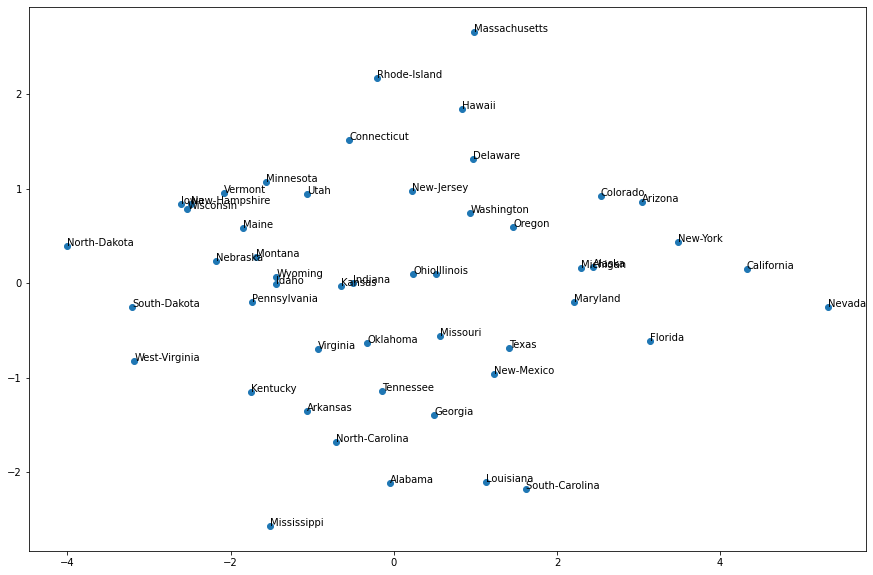

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
for l,x,y in zip(label,x_pca[:,0],x_pca[:,1]):
    plt.annotate(l,xy=(x,y))

wcss:calcule de distance dans le meme cluster

In [82]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='random',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #wcss+=[kmeans.inertia_]
    

C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

In [77]:
wcss

[349.99999999999994,
 211.2939922146492,
 170.56290677789966,
 138.193210931884,
 118.08727808452035,
 109.2539328934419,
 100.58501962389494,
 91.67195569460415,
 82.69338036678269,
 77.39201622204712]

Text(0.5, 1.0, 'Elbow method')

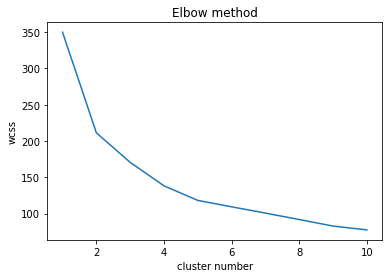

In [78]:
plt.plot(range(1,11),wcss,)
plt.xlabel('cluster number')
plt.ylabel('wcss')
plt.title('Elbow method')

klean++ algo dinitialisation des centroide

In [37]:
!pip install kneed


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from kneed import KneeLocator
k=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')


In [84]:
k.elbow

3

In [158]:
kmeans_sc=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans_sc.fit(x_scaler)
y_kmeans_sc=kmeans_sc.labels_

C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


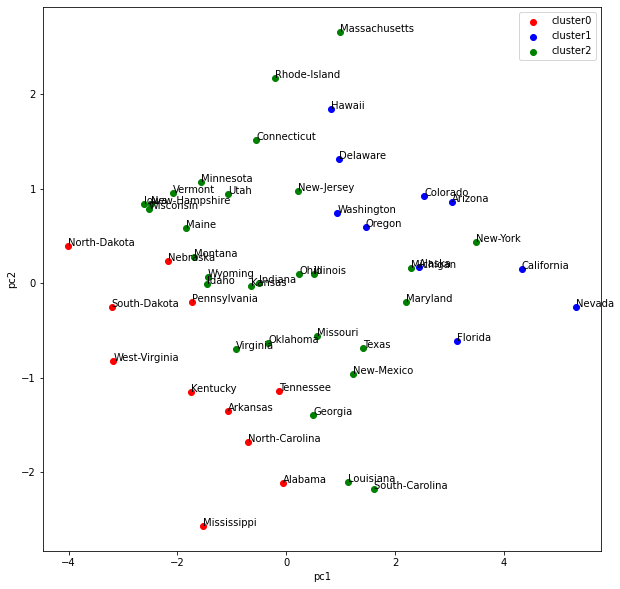

In [159]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],c='red',label='cluster0')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],c='b',label='cluster1')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],c='green',label='cluster2')

for l,x,y in zip (label,x_pca[:,0],x_pca[:,1]):
    plt.annotate(l,xy=(x,y))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()

In [156]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(x)
y_kmeans=kmeans.labels_

C:\Users\User\Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


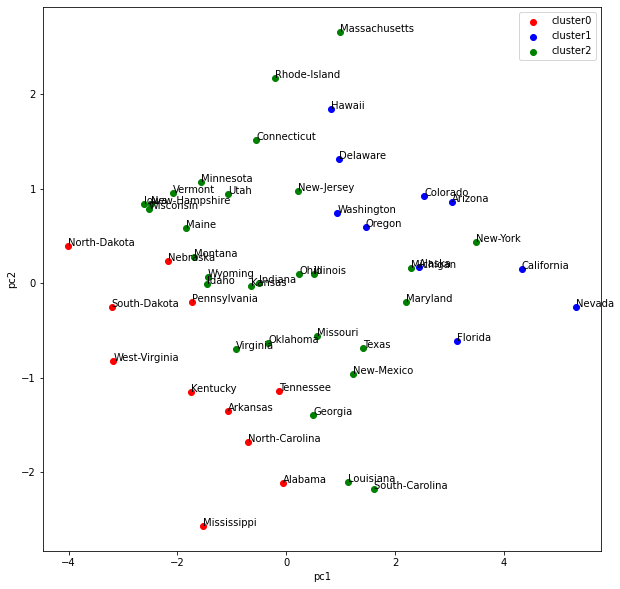

In [157]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],c='red',label='cluster0')
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],c='b',label='cluster1')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],c='green',label='cluster2')

for l,x,y in zip (label,x_pca[:,0],x_pca[:,1]):
    plt.annotate(l,xy=(x,y))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()